# ECUACIONES DIFERENCIALES PARCIALES I  
## Alejandro Felipe Aviles - 5MV1 - 16/01/2023  
**Aclaración**: El primer programa está escrito en Python y el segundo en Octave debido a que para el segundo, Python no logró graficar correctamente la gráfica en 3D y ya no tenía tiempo para arreglar ese código

### PROBLEMA 1

La solución de la ecuación

$$\dfrac{\partial  u }{\partial t}= \dfrac{\partial  u }{\partial x^2}$$

sujeta a las siguientes condiciones de frontera

$$u(0,t)=u(1,t)=0 \hspace{1cm}t>0$$

y condición inicial

$$u(x,0)=2x+1\hspace{1cm}0<x<1$$

Está dada en términos de la serie de Fourier por la expresión:

$$
u(x,t)=\sum_{n=1}^{\infty}-2\dfrac{3(-1)^n-1}{n\pi}\sin{(n\pi x)e^{-n^2\pi^2t}}
$$

In [2]:
from pylab import *
from matplotlib import animation,rc # biblioteca de animacion
from IPython.display import HTML # biblioteca para generar el video
%config InlineBackend.figure_format = 'retina'

Para empezar, graficamos la condición inicial.

In [3]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 2*x[i] + 1
    return y

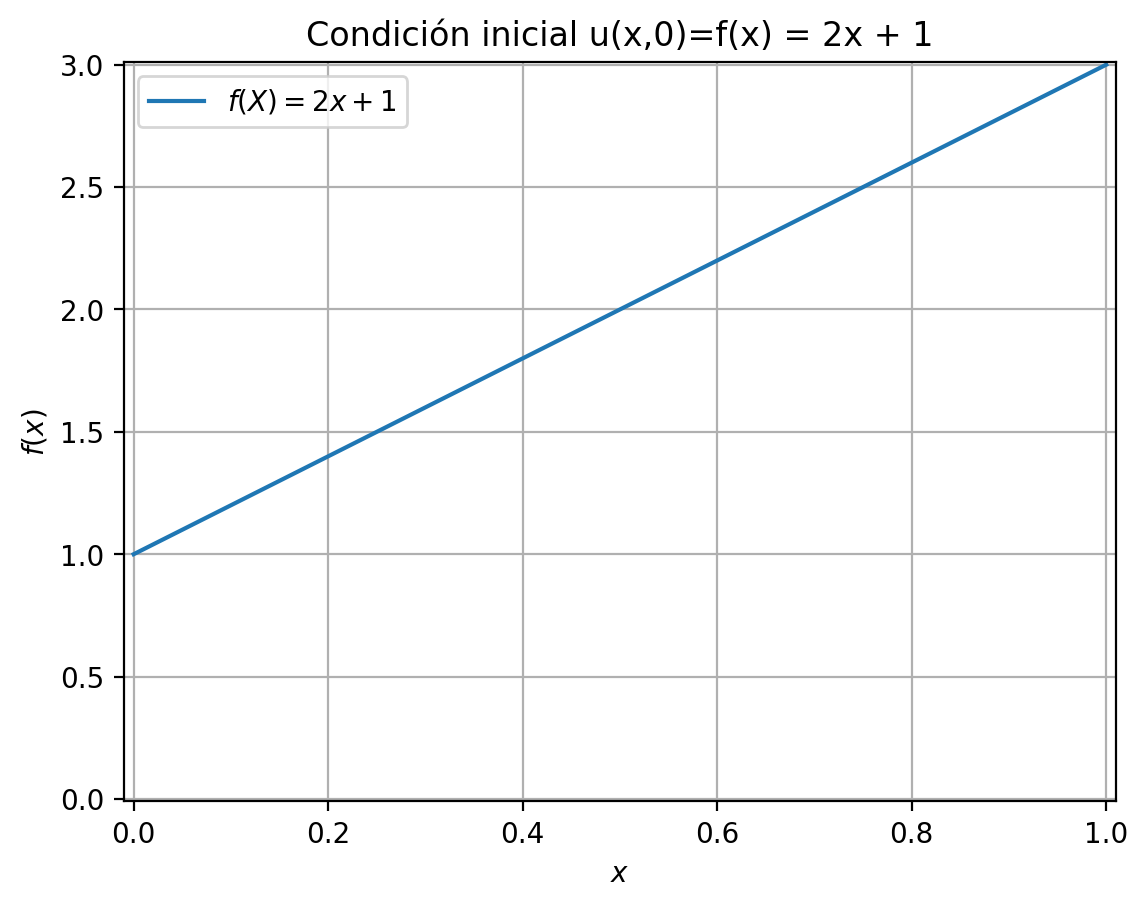

In [19]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1,1000)
f = recta(x)
plt.plot(x,f,label='$f(X) = 2x + 1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial u(x,0)=f(x) = 2x + 1")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,3.01])
plt.grid()
plt.legend()
plt.show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=2x+1$

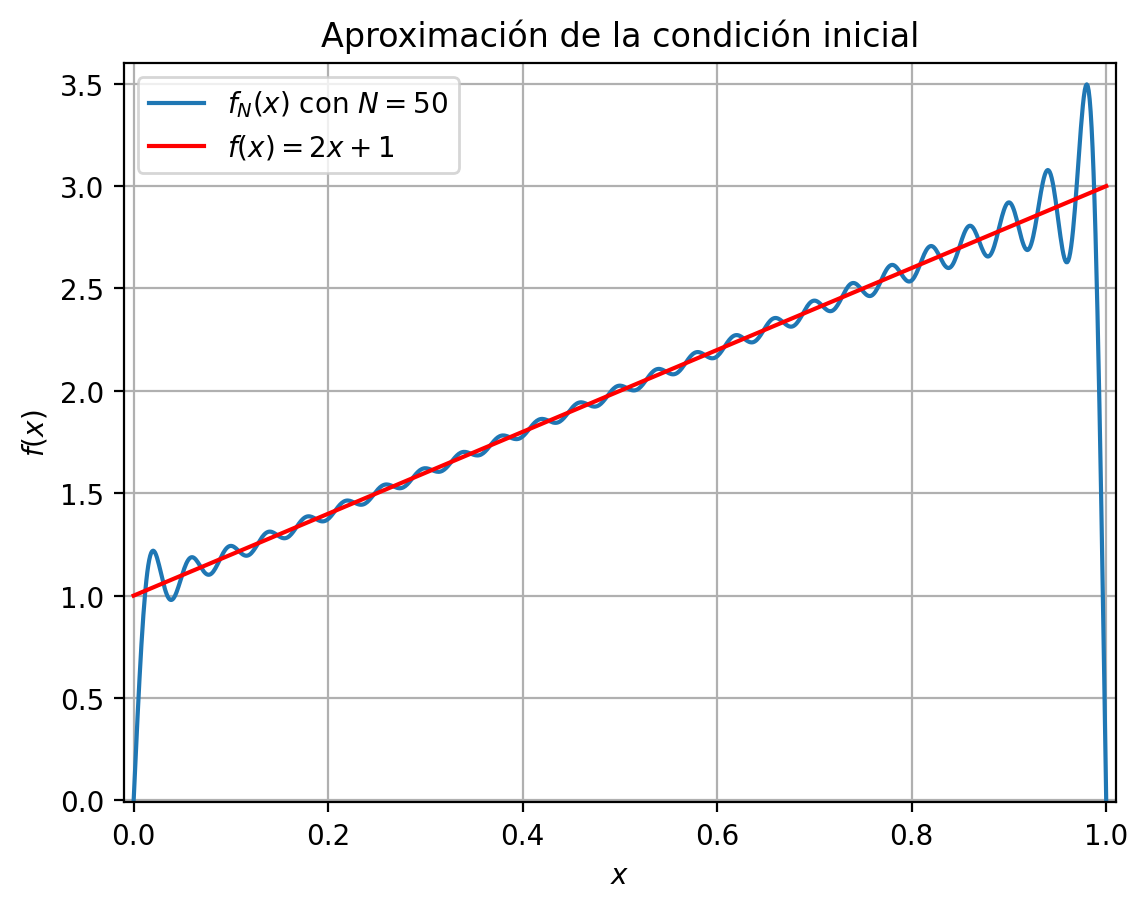

In [5]:
def u_0(x,N=50): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += -(3*((-1)**n)-1)*sin(n*pi*x)/(n)
    return (2.0/pi)*f

f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=50$')
plt.plot(x,f,label='$f(x)=2x+1$', color='red')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,3.6])
plt.grid(),plt.legend()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

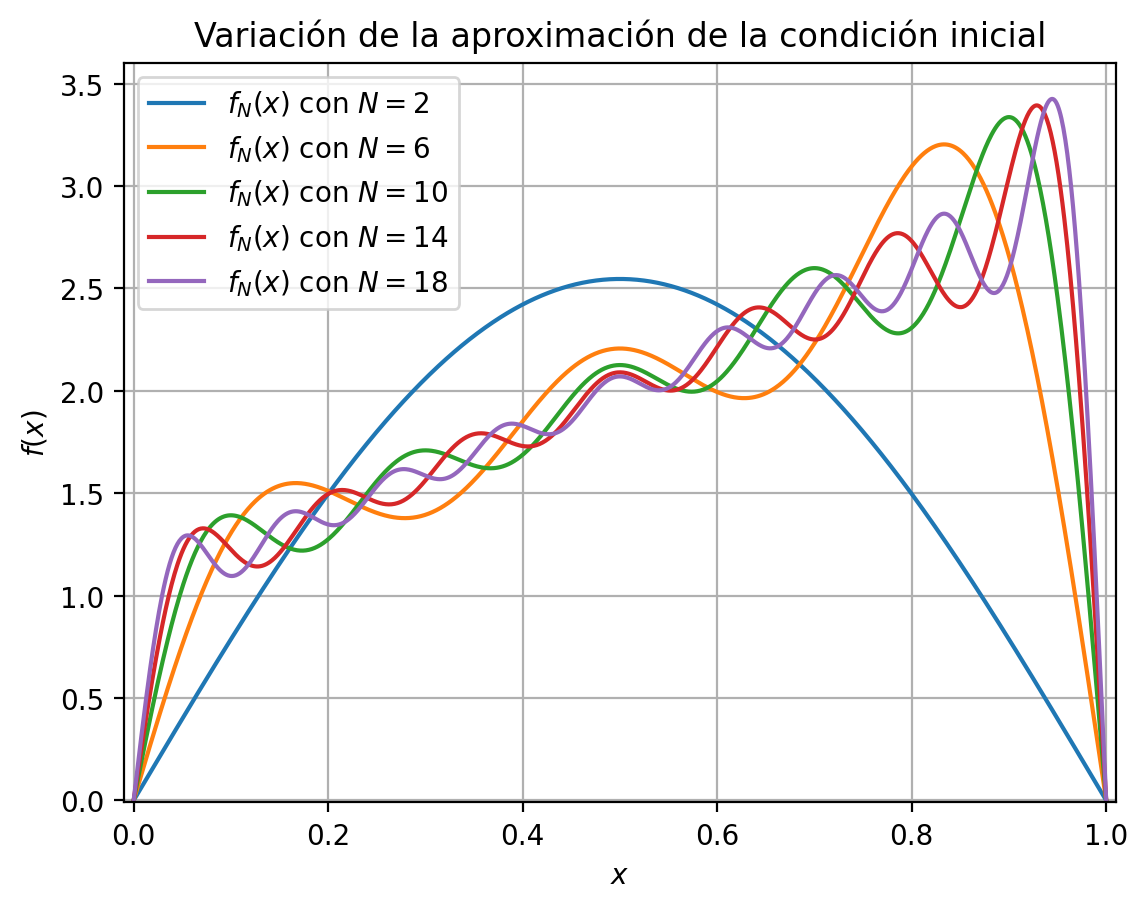

In [20]:
for i in range(2,20,4):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Variación de la aproximación de la condición inicial")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,3.6])
plt.grid(),plt.legend()
plt.show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial $t=0$

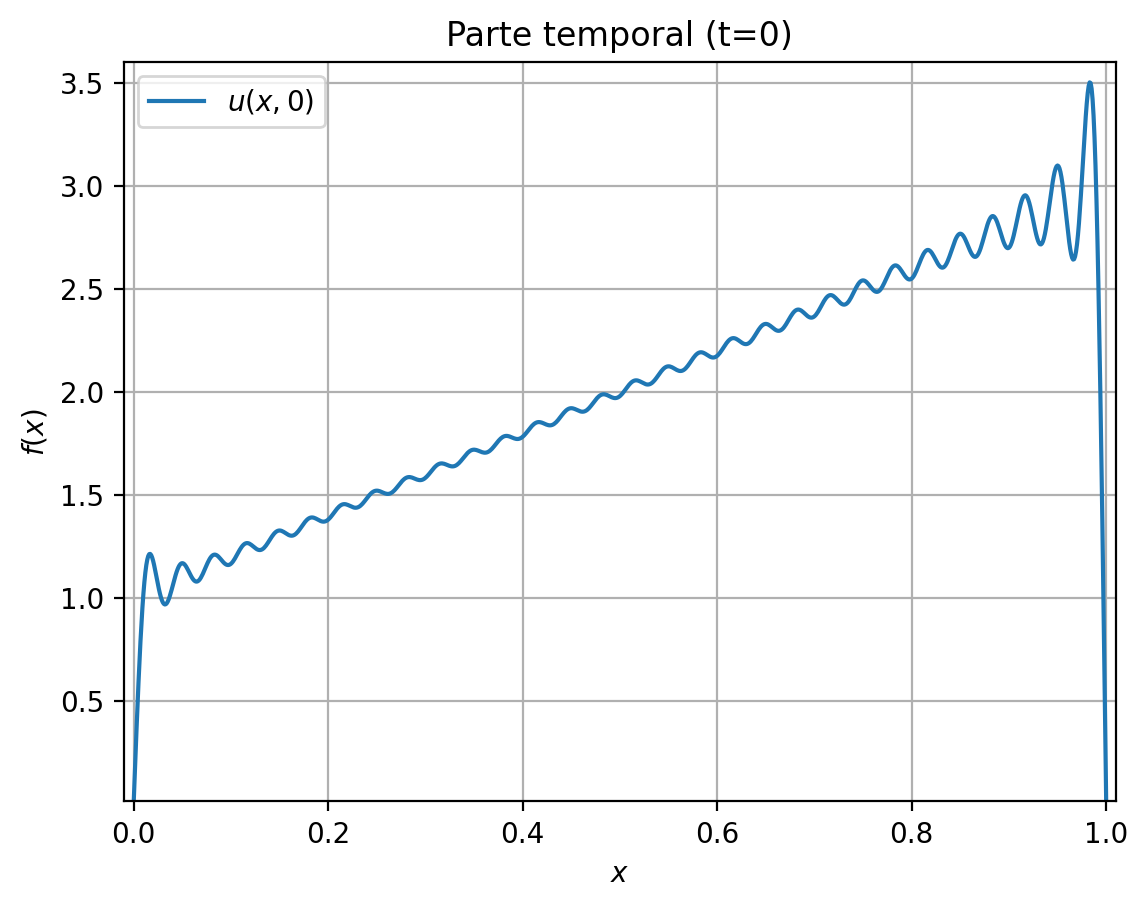

In [21]:

def u_x_t(x,t,N=60):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += -(3*((-1)**n)-1)*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f


x = linspace(0,1,1000)
t = linspace(0,1,1000)
U = u_x_t(x,t)

plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Parte temporal (t=0)")
plt.xlim([-0.01,1.01])
plt.ylim([0.01,3.6])
plt.grid(),plt.legend()
plt.show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$

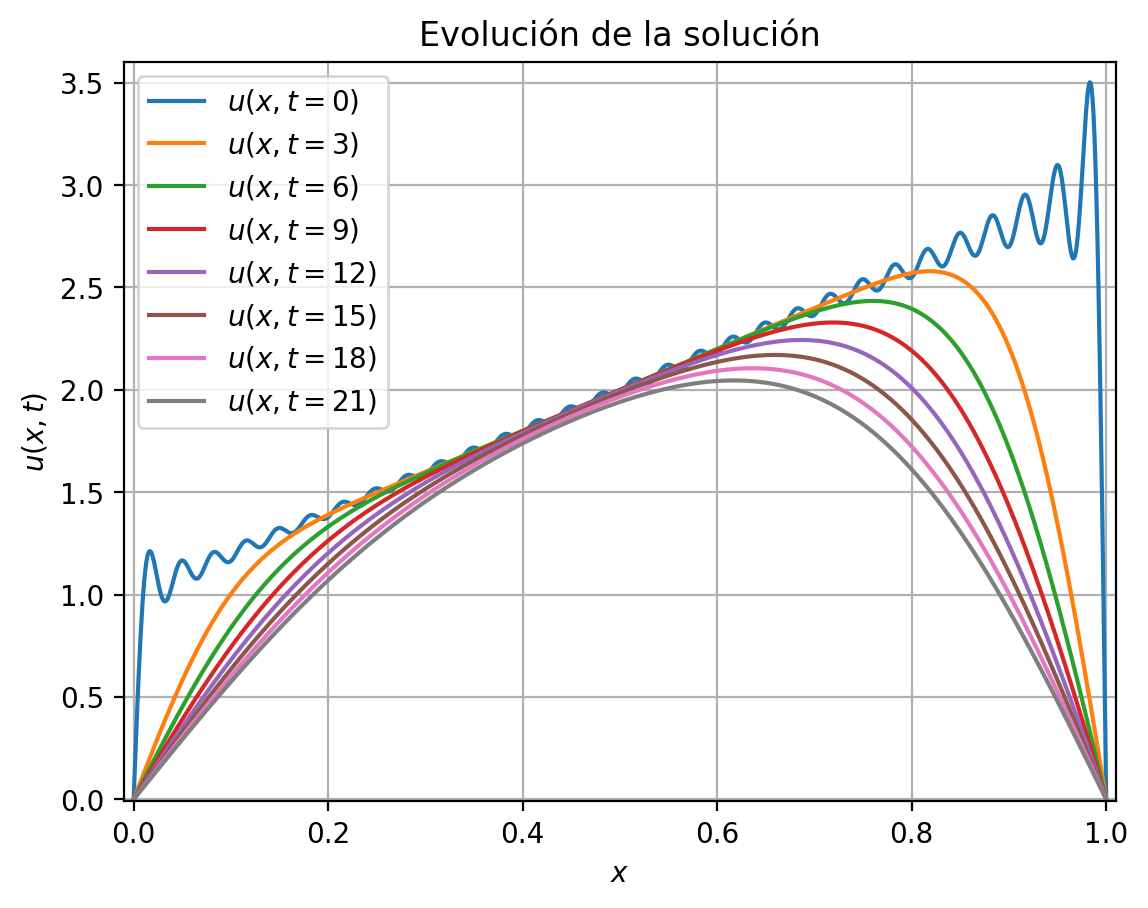

In [8]:
for i in range(0, 22, 3):
    plt.plot(x, U[:, i], label='$u(x,t='+str(i)+')$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,3.6])
plt.grid(),plt.legend()
plt.show()

Y podemos ver esto en una gráfica en 3D.

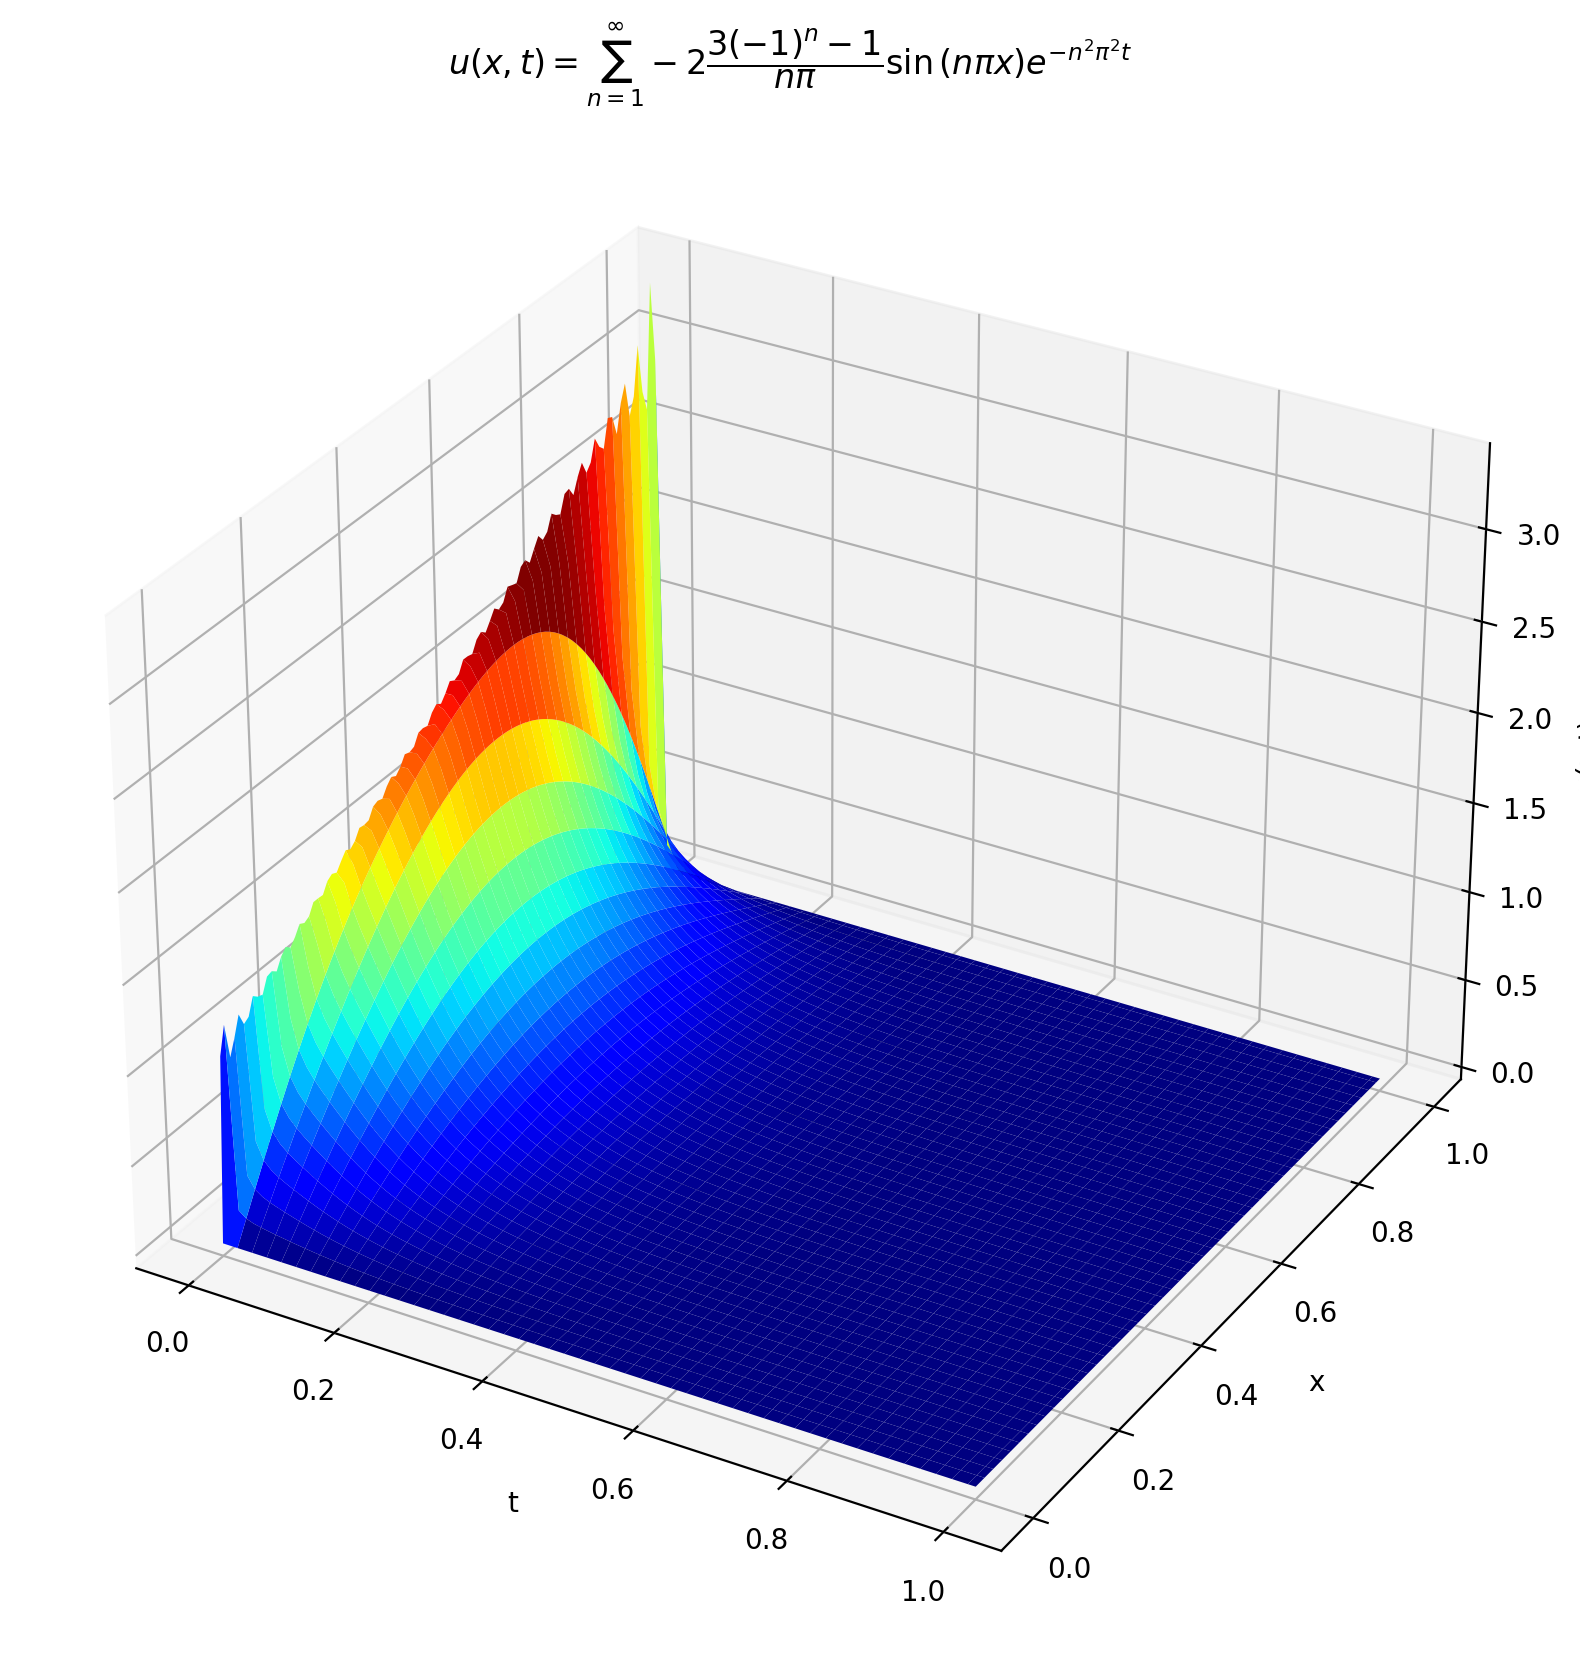

In [22]:
#%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u(x,t)')
X,T = np.meshgrid(x,t)

U = u_x_t(x,t)
plt.title( r'$u(x,t)=\sum_{n=1}^{\infty}-2\dfrac{3(-1)^n-1}{n\pi}\sin{(n\pi x)e^{-n^2\pi^2t}}$' )
ax.plot_surface(X, T, U, cmap="jet"); 